<a href="https://colab.research.google.com/github/h0806449f/PyTorch/blob/main/DB_03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **=== 0. Computer vision libaries in Pytorch ===**
1. `torchvision.datasets` - Get datasets and loading functions
2. `torchvision.models` - Get pretrained model
3. `torchvision.transforms` - Functions for manipulating data
4. `torch.utils.data.Dataset` - Base dataset class for pytorch
5. `torch.utils.data.Dataload` - Creates a python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvisiob
import torchvision
from torchvision import datasets, transforms
# ToTensor (https://pytorch.org/vision/stable/transforms.html)
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


# **=== 1. Get dataset (Fashion MNIST) ===**

In [2]:
# Setup training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",   # 資料儲存的路徑
    train=True,   # 下載 “訓練” 資料集
    download=True,   # 是否從網路上下載
    transform=ToTensor(), # 將下載資料轉為 Tensor 型態
    target_transform=None   # 對 Label 是否進行任何處理
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,   # 下載 “測試” 資料集
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12631993.03it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 214688.35it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3959708.76it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17526198.86it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# 檢視資料集大小
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Label 數量與類別
class_names = train_data.classes
len(class_names), class_names

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [5]:
# 轉換為 dict
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image, label = train_data[0]

type(image), label

(torch.Tensor, 9)

# 1.1 Check input and output shapes of data

In [7]:
# Check the shape of image

print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


# 1.2 Visualizing our data

(-0.5, 27.5, 27.5, -0.5)

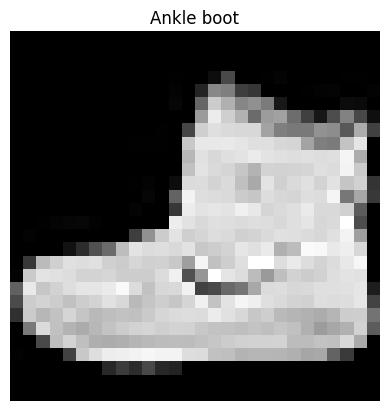

In [8]:
image, label = train_data[0]

# 每筆資料包含 : image tensor & label
# 如果直接 plt.imshow(image) 會產生error (shape)
# TypeError: Invalid shape (1, 28, 28) for image data

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")

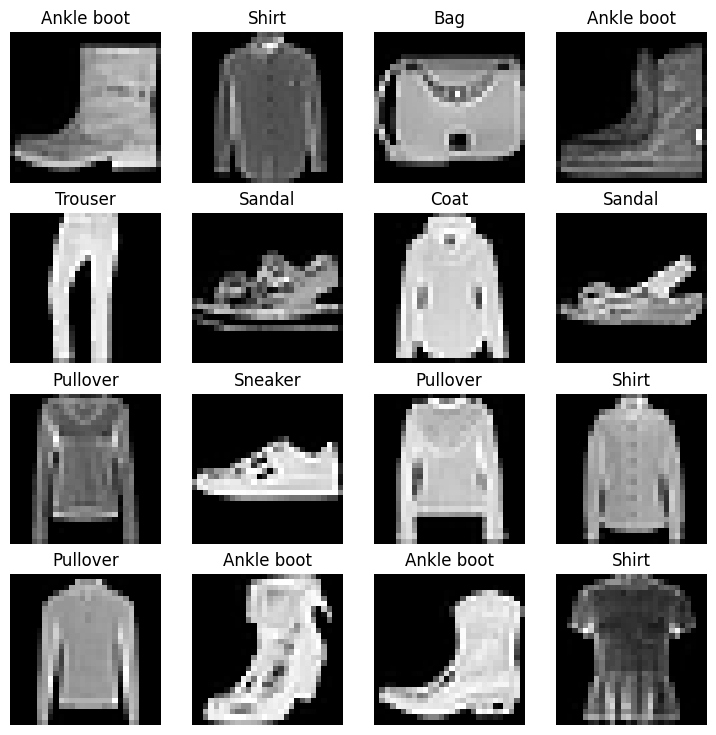

In [9]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    # 下限 0 / 上限 len(train_data)
    # size=[1] 生成size為1的 tensor
    # .item() 適用於取出 tensor 中的值 (只可以用於tensor中只有一個值的時候)
    random_idx = torch.randint(0, len(train_data), size=[1]).item()

    # 從資料集中 取出隨機index 的圖片
    img, label = train_data[random_idx]

    # Subplot
    fig.add_subplot(rows, cols, i)

    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")

# **=== 2. Prepare dataloader ===**
1. 下載後的資料型態 : Pytorch Datasets
2. `DataLoader` will turn Pytorch Datasets into **Python iterable**
    (可以將所有資料轉為 batches -> batches -> ...)
3. 目的 :
    1. 節省 RAM
    2. CNN 有更多機會更新參數

In [10]:
# 從 MNIST 下載的資料
print(train_data)
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [11]:
from torch.utils.data import DataLoader
# 建議參考 : https://pytorch.org/docs/stable/data.html

# Setup the batch size (希望之後一次分析32張圖片)
BATCH_SIZE = 32

# Turn datasets into iterable (batches)
# shuffle 避免同類資料 連續出現
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(type(train_dataloader), len(train_dataloader))  # 60000 / 32 = 1875
print(type(test_dataloader), len(test_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'> 1875
<class 'torch.utils.data.dataloader.DataLoader'> 313


In [12]:
# 確認 train_dataloader 有無問題
# Check info of  train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# 一個 batch 32張 28*28的 灰階圖片
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

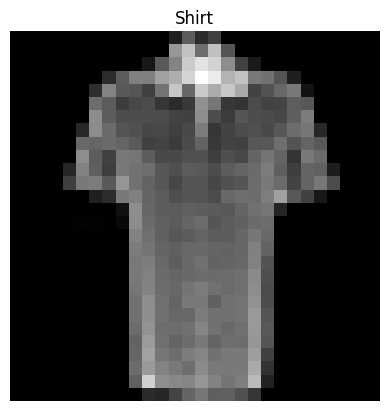

In [13]:
# 從隨機的 batch 裏面 隨機挑選照片 出來檢查
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# show image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")

# **=== 3. Build a baseline model ===**

建立基礎模型 -> 再逐漸增加模型複雜程度

In [14]:
# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create a flatten layer (一維化)
flatten_model = nn.Flatten()

# Get single sample
x = train_features_batch[0]   # 取出batch中的第一個

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out process
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

# 這邊轉換成一維 因為等等的模型將使用 nn.Linear 去建構
# 而 nn.Linear 無法處理 多維資訊

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [15]:
from torch import nn

# Subclass
class FashionMNISTModelV0(nn.Module):
    # Inherit
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        # layers
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    # forward
    def forward(self, x):
        return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,   # Flatten from 28 * 28
    hidden_units=10,   # how many units in the hidden layer
    output_shape=len(class_names)
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

# 3.1 Setup loss function, optimizer and evaluation metrics

1. Loss function - `nn.CrossEntropyLoss` since we are working with multi-class data
2. Optimizer - `torch.optim.SDG()` or `torch.optim.Adam` both will work
3. Evaluation metric - `accuracy`

In [17]:
# 下載作者預先建立好的 functions
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import 課程作者寫好的功能
from helper_functions import accuracy_fn

In [18]:
# Set loss function
loss_fn = nn.CrossEntropyLoss()

In [19]:
# Set optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

# 3.2 額外: Creating a function to time the experiments
https://docs.python.org/zh-cn/3/library/timeit.html

In [20]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """ 計算時間 """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

# 3.3 Creating training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps and calculate the train loss `per batch`
3. 模型每一個 batch 就會調整一次參數 (梯度下降)
4. Loop through testing batches, perform testing steps and calculate the test loss `per batch
5. Print out process
6. Time it all *(optional)*





In [21]:
# Practice
from tqdm.auto import tqdm

# to device "cpu"
device = "cpu"
model_0 = model_0.to(device)

torch.manual_seed(42)
start_time = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n", "="*20)

    ### Training
    train_loss = 0

    # Batch the data
    for batch, (X_train, y_train) in enumerate(train_dataloader):
        # to device "cpu"
        X_train, y_train = X_train.to(device), y_train.to(device)

        # Train mode
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X_train)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y_train)
        train_loss = train_loss + loss  # accumulate train loss

        # 3. Optimizer zero grad  (使各個batch之間的參數不互相影響)
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print process
        if batch % 1000 == 0:
            print(f"Looked at {batch * len(X_train)} / {len(train_dataloader.dataset)} samples.")

    # Batch 結束後, 隨 epoch 計算 batch 平均的loss值
    train_loss = train_loss / len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0

    # Eval mode
    model_0.eval()

    #
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # to device "cpu"
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate the loss (accumulative)
            test_loss = test_loss + loss_fn(test_pred, y_test)

            # 3. Calculate the accuracy
            test_acc = test_acc + accuracy_fn(y_true = y_test,
                                              y_pred = test_pred.argmax(dim=1))
                                              # test_pred 為 model_0 產出的 logits, 須經argmax 處理

        # Calculate the test loss average per batch
        test_loss = test_loss / len(test_dataloader)

        # Calculate the test accuracy average per batch
        test_acc = test_acc / len(test_dataloader)

    # Print out process
    print(f"\nTrain loss: {train_loss:.4f}")
    print(f"Test loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}")

#
end_time = timer()
model_0_time = end_time - start_time

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Looked at 0 / 60000 samples.
Looked at 32000 / 60000 samples.

Train loss: 0.6355
Test loss: 0.5304 | Test_acc: 80.7907
Epoch: 1
Looked at 0 / 60000 samples.
Looked at 32000 / 60000 samples.

Train loss: 0.4999
Test loss: 0.4911 | Test_acc: 82.6278
Epoch: 2
Looked at 0 / 60000 samples.
Looked at 32000 / 60000 samples.

Train loss: 0.4741
Test loss: 0.4989 | Test_acc: 82.8574
Epoch: 3
Looked at 0 / 60000 samples.
Looked at 32000 / 60000 samples.

Train loss: 0.4599
Test loss: 0.4795 | Test_acc: 83.1270
Epoch: 4
Looked at 0 / 60000 samples.
Looked at 32000 / 60000 samples.

Train loss: 0.4527
Test loss: 0.4798 | Test_acc: 82.9872


# **=== 4. Make prediction and get Model_0 result ===**
1. def eval_model function

In [22]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    returns a dict containing the result of model prediction on data_loader
    """

    loss, acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make prediction
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss = loss + loss_fn(y_pred, y)
            acc = acc + accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc and find average loss/acc per batch
        loss = loss / len(data_loader)
        acc = acc / len(data_loader)

    #
    return {"model_name": model.__class__.__name__,
            # 僅適用 model was created with a class

            "model_loss": loss.item(),
            "model_acc": acc}

In [23]:
# 對 model_0 使用 上面建立的 eval_model
torch.manual_seed(42)

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results, model_0_time

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4798120856285095,
  'model_acc': 82.98722044728434},
 55.58744008200003)

# **=== 5. Model_1 run on GPU ===**

# 5.1 Device

In [24]:
# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 5.2 Model_1
1. nn.Linear
2. non-linearlity -> ReLU()

In [25]:
# Subclass
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [26]:
# 建立模型
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

# 檢查模型的參數 是否都到同一個設備上
next(model_1.parameters()).device

device(type='cuda', index=0)

In [27]:
# 指定 Loss function (計算 loss 值)
loss_fn = nn.CrossEntropyLoss()

In [28]:
# 指定 Optimizer (優化參數 -> 減少 loss 值 -> 梯度下降)
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# 5.2.1 Functions
1. 作者的 helper_function
2. timer

In [29]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download


In [30]:
from timeit import default_timer as timer

def print_train_time(start: float,
            end: float,
            device: torch.device = None):
    """ 計算時間 """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.2f} seconds")
    return total_time

# 5.3 Functionizing training and evaluation / test loop
額外創造兩個functions
1. training loop - `train_step()`
    *思考順序: 這個 function 需要哪一些參數*
    *也可以帶入其他 function / device ...*
2. test loop - `test_step()`


In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0

    model.to(device)

    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [32]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0

    model.to(device)
    model.eval() # put model in eval mode

    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [33]:
# 使用上面兩個 functions
torch.manual_seed(42)

# Start time
from timeit import default_timer as timer
start_time = timer()

# Set epochs
epochs = 5

# Create optimization and evaluation loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n==========")

    # train_step
    train_step(data_loader = train_dataloader,
               model = model_1,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn)

    # test_step
    test_step(data_loader = test_dataloader,
              model = model_1,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn)

end_time = timer()
model_1_time = end_time - start_time

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Epoch: 3
Train loss: 0.64384 | Train accuracy: 76.52%
Test loss: 0.65079 | Test accuracy: 76.13%

Epoch: 4
Train loss: 0.62892 | Train accuracy: 77.00%
Test loss: 0.65277 | Test accuracy: 75.95%



In [34]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    returns a dict containing the result of model prediction on data_loader
    """

    loss, acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # put data to GPU
            X, y = X.to(device), y.to(device)

            # Make prediction
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss = loss + loss_fn(y_pred, y)
            acc = acc + accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc and find average loss/acc per batch
        loss = loss / len(data_loader)
        acc = acc / len(data_loader)

    #
    return {"model_name": model.__class__.__name__,
            # 僅適用 model was created with a class

            "model_loss": loss.item(),
            "model_acc": acc}

In [35]:
# compare with each other
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

# **=== Recap ===**
model_0 vs model_1
1. 都使用了 nn.Flatten()
1. model_1 多加了 nn.ReLU()
2. model_1 改使用 GPU
3. 但, **兩模型成效差不多**

In [36]:
model_0_results, "="*25, model_1_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4798120856285095,
  'model_acc': 82.98722044728434},
 '=========================',
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6527653932571411,
  'model_acc': 75.94848242811501})

# **=== 6. Build a CNN ===**
1. nn.Faltten() VS. nn.Conv2d()
    一維化 VS. 特徵擷取
2. 簡單介紹
    https://poloclub.github.io/cnn-explainer/

In [37]:
# model_2 設置簡單的CNN

# Subclass
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        # Inherit
        super().__init__()

        # 卷積層
        # Blocks (layer + layer ...)
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = (3,3),
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = (3,3),
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2,2))
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = (3,3),
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = (3,3),
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (2,2))
        )

        # 分類層
        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7,
                      out_features = output_shape)
        )

    # Forward pass
    def forward(self, x):
        x = self.conv_block_1(x)
        # print("After block_1: ", x.shape)
        x = self.conv_block_2(x)
        # print("After block_2: ", x.shape)
        x = self.classifier(x)
        return x

In [38]:
# 建立 CNN
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,  # FashionMNIST 為黑白圖片
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

# 6.1 CNN explain

1. `Conv2d()`
    1. 擷取特徵 (in -> out)
    2. 卷積核 大小
    3. 步長
    4. 擴增原圖
2. `MaxPool2d()` & `AveragePool2d()`
    減少空間特徵
    1. 取最大值 -> 擷取邊緣
    2. 取平均值 -> 模糊化

In [39]:
# Create a batch of image (注意shape)
images = torch.randn(size = (32, 3, 64, 64))  # 32張 彩色 64*64圖片

# 取一
test_image = images[0]

# 檢查shape
print(f"Batch shape: {images.shape}")
print(f"image shape: {test_image.shape}")

Batch shape: torch.Size([32, 3, 64, 64])
image shape: torch.Size([3, 64, 64])


In [40]:
# Creata a single Conv2d layer
temp_conv2d = nn.Conv2d(in_channels = 3,
                        out_channels = 10,
                        kernel_size = (3, 3),
                        stride = 1,
                        padding = 1)

# Pass the data through "temp_conv2d"
conv2d_output = temp_conv2d(test_image)

# Check shape
print(f"shape 'Before' conv2d: {test_image.shape}")
print(f"shape 'After' conv2d: {conv2d_output.shape}")

shape 'Before' conv2d: torch.Size([3, 64, 64])
shape 'After' conv2d: torch.Size([10, 64, 64])


In [41]:
# Create a single Maxpool2d layer
temp_maxpool = nn.MaxPool2d(kernel_size = (2, 2))

# Pass the "conv2d_output" through "temp_maxpool"
maxpool_output = temp_maxpool(conv2d_output)

# Check shape
print(f"shape 'Before' maxpool: {conv2d_output.shape}")
print(f"shape 'Before' maxpool: {maxpool_output.shape}")

shape 'Before' maxpool: torch.Size([10, 64, 64])
shape 'Before' maxpool: torch.Size([10, 32, 32])


# 6.2 FashionMNIST 通過 model_2卷積層
圖片通過 model_2 卷積層 (尚未訓練)


In [42]:
# FashionMNIST 第一張圖 -> image
# plt.imshow(image.squeeze(), cmap="gray")

# 設置 device
# image = image.unsqueeze(dim=0).to(device)

# 通過 model_2
# model_2(image)

In [43]:
# 上面錯誤, 源自於 model_2 的"分類層"
# nn.Flatten(),
# nn.Linear(in_features = hidden_units ...

In [44]:
# 硬 更正模型
        # self.classifier = nn.Sequential(
        #     nn.Flatten(),
#!!!    #     nn.Linear(in_features = hidden_units*7*7,
        #               out_features = output_shape)
        # )

In [45]:
# 設置 device
image = image.unsqueeze(dim=0).to(device)

# 通過 model_2
model_2(image)

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

# 6.3 完善 model_2
1. Loss
2. Optimizer
3. Train function
4. Test function
5. Eval function

In [46]:
# 設置 Loss
loss_fn = nn.CrossEntropyLoss()

In [47]:
# 設置 Optimizer
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [48]:
torch.manual_seed(42)

start_time = timer()

epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n==========")

    train_step(model = model_2,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

    test_step(model = model_2,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)

end_time = timer()
model_2_time = end_time - start_time

Epoch: 0
Train loss: 0.59534 | Train accuracy: 78.23%
Test loss: 0.39143 | Test accuracy: 86.00%

Epoch: 1
Train loss: 0.35917 | Train accuracy: 87.06%
Test loss: 0.34865 | Test accuracy: 87.36%

Epoch: 2
Train loss: 0.31868 | Train accuracy: 88.28%
Test loss: 0.33221 | Test accuracy: 88.05%



In [49]:
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

# **=== Recap ===**
model_0, model_1, model_2

In [50]:
model_0_results, "="*25, model_1_results, "="*25, model_2_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4798120856285095,
  'model_acc': 82.98722044728434},
 '=========================',
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6527653932571411,
  'model_acc': 75.94848242811501},
 '=========================',
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.33221176266670227,
  'model_acc': 88.0491214057508})

# 6.3 Function of checking model info

In [51]:
# 檢查方式一
import torchsummary

torchsummary.summary(model_2, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
              ReLU-2           [-1, 10, 28, 28]               0
            Conv2d-3           [-1, 10, 28, 28]             910
              ReLU-4           [-1, 10, 28, 28]               0
         MaxPool2d-5           [-1, 10, 14, 14]               0
            Conv2d-6           [-1, 10, 14, 14]             910
              ReLU-7           [-1, 10, 14, 14]               0
            Conv2d-8           [-1, 10, 14, 14]             910
              ReLU-9           [-1, 10, 14, 14]               0
        MaxPool2d-10             [-1, 10, 7, 7]               0
          Flatten-11                  [-1, 490]               0
           Linear-12                   [-1, 10]           4,910
Total params: 7,740
Trainable params: 7,740
Non-trainable params: 0
-----------------------------------

In [52]:
# 檢查方式二
!pip install torchinfo
import torchinfo

torchinfo.summary(model_2, (10, 1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModelV2                      [10, 10]                  --
├─Sequential: 1-1                        [10, 10, 14, 14]          --
│    └─Conv2d: 2-1                       [10, 10, 28, 28]          100
│    └─ReLU: 2-2                         [10, 10, 28, 28]          --
│    └─Conv2d: 2-3                       [10, 10, 28, 28]          910
│    └─ReLU: 2-4                         [10, 10, 28, 28]          --
│    └─MaxPool2d: 2-5                    [10, 10, 14, 14]          --
├─Sequential: 1-2                        [10, 10, 7, 7]            --
│    └─Conv2d: 2-6                       [10, 10, 14, 14]          910
│    └─ReLU: 2-7                         [10, 10, 14, 14]          --
│    └─Conv2d: 2-8                       [10, 10, 14, 14]          910
│    └─ReLU: 2-9                         [10, 10, 14, 14]          --
│    └─MaxPool2d: 2-10                   [10, 10, 7, 7]            --
├─Sequentia

# **=== 7. 比較以上三種模型 ===**
1. DataFrame
2. Visualize

In [53]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.479812,82.987220
1,FashionMNISTModelV1,0.652765,75.948482
2,FashionMNISTModelV2,0.332212,88.049121


In [54]:
# Add training time to result comparison
compare_results["training_time"] = [model_0_time,
                                    model_1_time,
                                    model_2_time]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.479812,82.987220,55.587440
1,FashionMNISTModelV1,0.652765,75.948482,69.556915
2,FashionMNISTModelV2,0.332212,88.049121,41.752316


Text(0, 0.5, 'model')

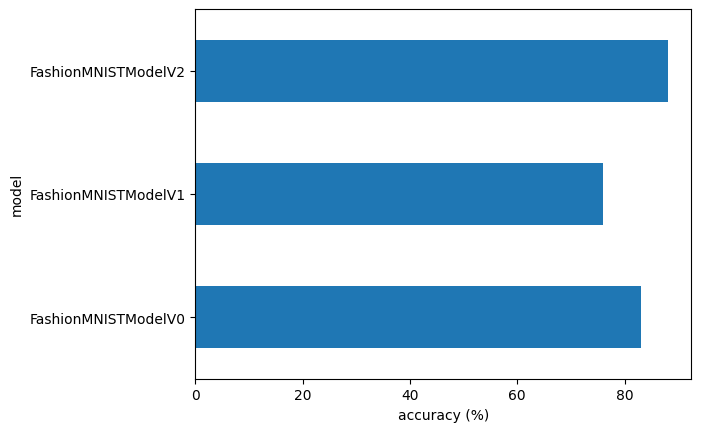

In [55]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

# **=== 8. Random predictions ===**

In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

    pred_probs = []

    # Set model to device
    model.to(device)

    # eval mode
    model.eval()

    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU ( matplotlib無法在GPU上運作 )
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [58]:
import random

random.seed(42)

test_samples = []
test_labels = []

# 隨機從 test_data 挑選9個
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

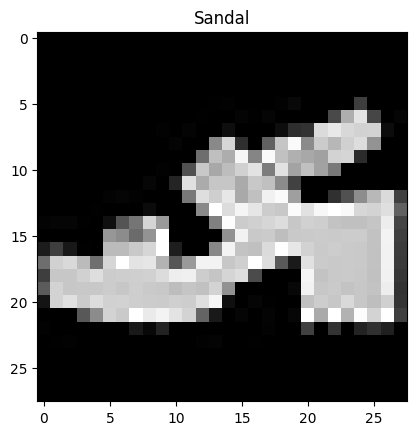

In [59]:
# 檢查 test_samples & test_labels 有無正確資料
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [60]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View first two predictions (這邊只取兩個看一下機率)
pred_probs[:2]

tensor([[1.1689e-07, 4.1025e-08, 6.6779e-08, 5.4774e-06, 5.5253e-09, 9.9993e-01,
         9.0486e-07, 2.8700e-06, 1.4694e-05, 4.4193e-05],
        [4.6592e-02, 3.7810e-01, 1.3046e-02, 2.2001e-01, 2.2308e-01, 3.0645e-04,
         1.1678e-01, 4.4556e-04, 5.1218e-04, 1.1305e-03]])

In [61]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

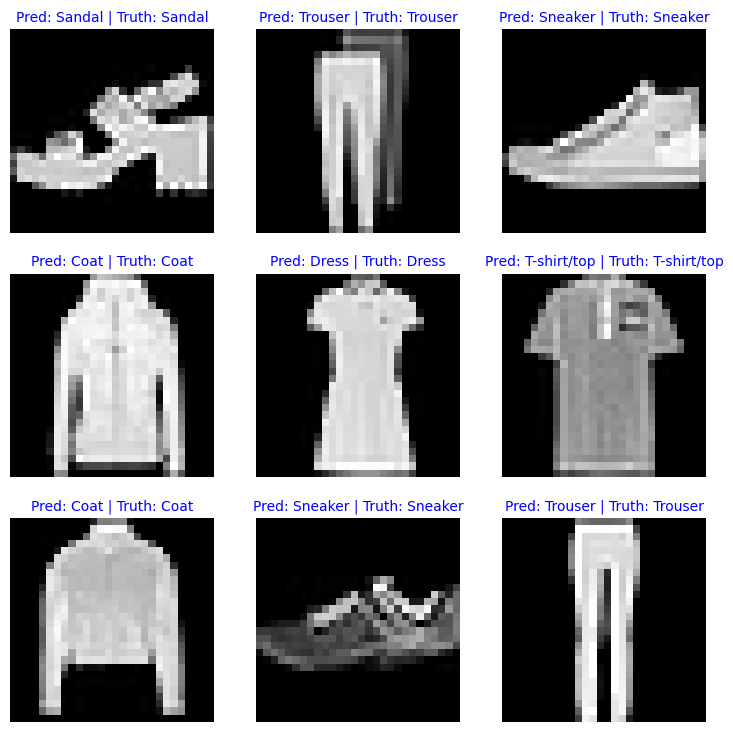

In [62]:
# Plot predictions
plt.figure(figsize=(9,9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)   # subplot 無法從0開始

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check equality between pred and truth and change the text color
    # 如正確 字體為綠色
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="b")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis("off")

# **=== 9. Confusion matrix ===**
1. Make prediction with trained model on test datatset
2. Make confusion matrix `torchmetrics.ConfusionMatrix`
3. Plt the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`
4. Info
    https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html

In [63]:
# 將會用到的工具
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.2 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [64]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    # Put predictions on CPU for evaluation (for matplotlib)
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

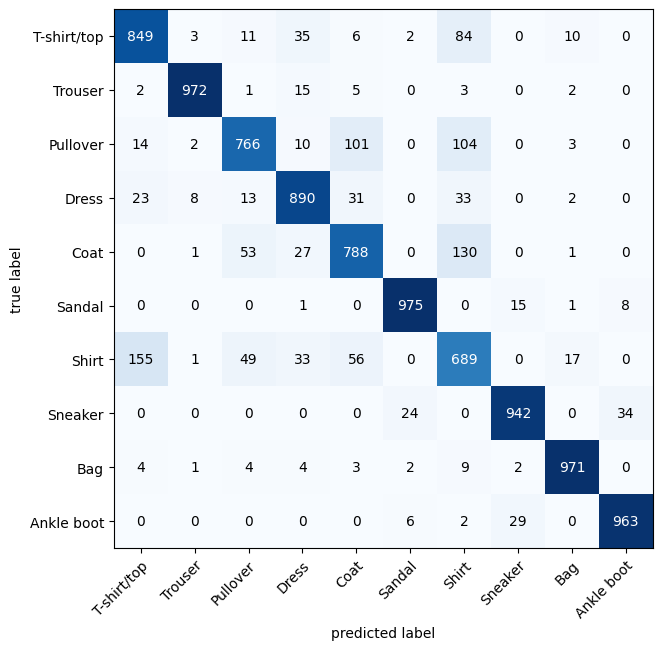

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),   # matplotlib prefer numpy
                                class_names=class_names,
                                figsize=(10, 7)
                                )

# **=== 10. Save and load trained model ===**

In [73]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")   # 會創造一個名為models的資料夾
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "DB_03_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)   # 這邊只儲存了 state dict

Saving model to : models/DB_03_computer_vision_model_2.pth


In [74]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [75]:
# check model_2 result again
# 等等用作比較
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33221176266670227,
 'model_acc': 88.0491214057508}

In [76]:
# Evaluate loaded model (result 應該與之前訓練時 一模一樣)
torch.manual_seed(42)

loaded_model_2_results = eval_model(model = loaded_model_2,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33221176266670227,
 'model_acc': 88.0491214057508}

In [81]:
# Check if model result are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02   # 可以指定容忍的不同程度
              )

tensor(True)